# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 5: Stock Price prediction using ARIMA

## Learning Objectives

At the end of the experiment you will be able to :

- Predict stock prices using ARIMA 


## Dataset description

In this Dataset, we see stocks and ETFs (Exchange trade funding) data for USA. The data is last updated on 11-10-2017 and is in txt format.
The columns of the data are:
1. Date
2. Open
3. High
4. Low
5. Close
6. volume
7. OpenInt


[Dataset link]( https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)


The files present are named according to Stock listing


A ticker symbol or stock symbol is an abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market. A stock symbol may consist of letters, numbers or a combination of both. "Ticker symbol" refers to the symbols that were printed on the ticker tape of a ticker tape machine.

To understand better go through : https://www.nasdaq.com/market-activity/stocks/screener

###  Domain Information
Stock price forecasting is one of the most challenging tasks in financial decision-making because stock prices are inherently noisy and non-stationary and have been observed to have a random-walk characteristic. Accurate stock price predictions can yield significant profits and therefore econometric and statistical approaches including linear/non-linear methods such as autoregressive (AR) models, moving averages (MA), autoregressive moving averages (ARIMA) and artificial neural networks have been in use. 

## ARIMA

Autoregressive Integrated Moving Average Model (ARIMA)
is a generalized model of Autoregressive Moving Average (ARMA) that combines
Autoregressive (AR) process and Moving Average (MA) processes and builds a composite model of the time series.
As the acronym indicates, ARIMA (p, d, q) captures the key elements of the model:
- AR: Autoregression. A regression model that uses the dependencies between an observation and a number of
lagged observations (p).
- I: Integrated. To make the time series stationary by measuring the differences of observations at different time
(d).
- MA: Moving Average. An approach that takes into accounts the dependency between observations and the
residual error terms when a moving average model is used to the lagged observations (q). 


### Setup Steps:

### Importing required packages

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

### Microsoft Stock Market Analysis using ARIMA


Read the Microsoft stock prices data file

In this notebook, we will just examine the “Close” stock prices feature. This same analysis can be repeated for most of the other features.

In [5]:
# You can change the file to predict stocks for different companies
# Open, High, Low, Close values are in dollars. 
# Volume refers to the number of contracts traded in a given period, 
# Open interest denotes the number of contracts that are open or active.

df = pd.read_csv("/content/msft.us.txt").fillna(0)
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [6]:
print(df.shape)
print(df.columns)

(7983, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


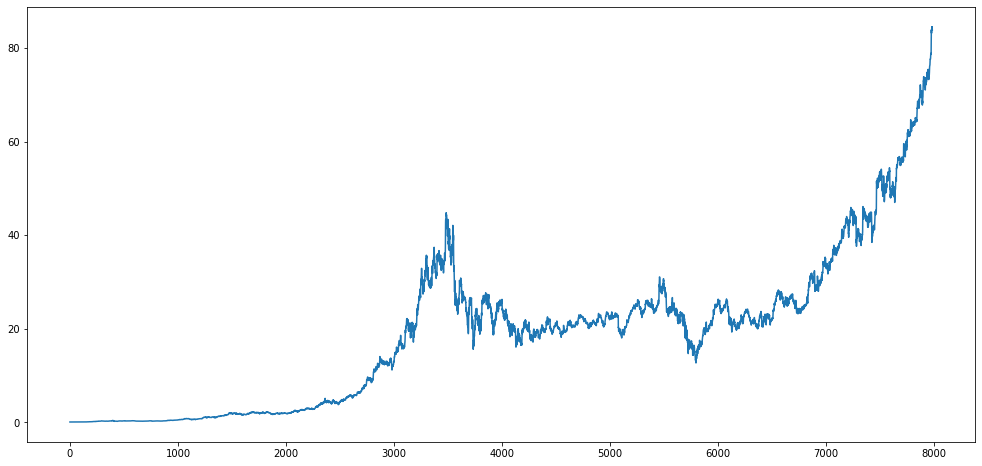

In [7]:
# Plot the closing values for Microsoft
plt.figure(figsize=(17,8))
plt.plot(df['Close'])

                             Date     Open     High      Low    Close  OpenInt
0                      1986-03-13  0.06720  0.07533  0.06720  0.07533        0
1            1986-03-131986-03-14  0.14253  0.15066  0.14253  0.15066        0
2  1986-03-131986-03-141986-03-17  0.21786  0.22599  0.21786  0.22599        0


Text(0.5, 1.0, 'Microsoft Cumulative Returns')

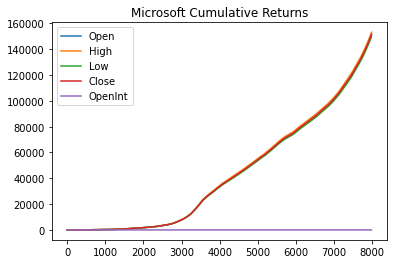

In [8]:
# Return the cumulative sum of the dataframe
df = df.drop(['Volume'],axis=1)
dr = df.cumsum()
print(dr[:3])
dr.plot()
plt.title('Microsoft Cumulative Returns')

Before starting working on Time Series prediction, we will analyse the autocorrelation plot of the "Close" feature with respect to a fixed lag of 1.

As there is not much change in the timeseries plot with differencing, So differencing can be set off.

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

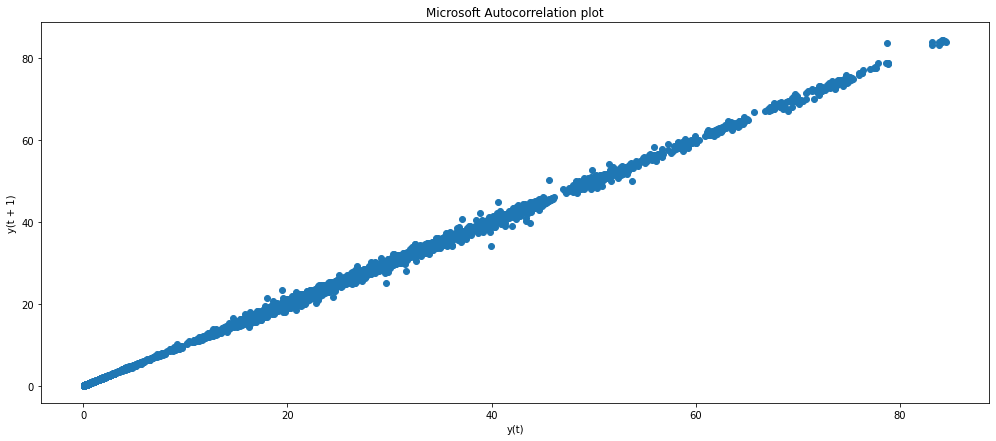

In [9]:
# Find the autocorrelation using lag plot. 
# A lag plot checks whether a data set or time series is random or not.
# Non-random data exhibits an identifiable structure in the lag plot (eg. linear structure).
plt.figure(figsize=(17,7))
lag_plot(df['Close'], lag=1)
plt.title('Microsoft Autocorrelation plot')

The above graph exhibits a linear pattern indicating that the data are non-random and suggests that an autoregressive model will be appropriate for this data.

In [12]:
# Find out the last date given in Microsoft data
date = df[-1:]['Date']
date

7982    2017-11-10
Name: Date, dtype: object

#### Test the stationarity using Dickey-Fuller test

In [13]:
# Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df.Close, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
pvalue = dftest[1]
if pvalue < 0.01:
    print('p-value = %.4f. The series is likely stationary.' % pvalue)
else:
    print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

print(dfoutput)

Results of Dickey-Fuller Test:
p-value = 0.9988. The series is likely non-stationary.
Test Statistic                    2.133638
p-value                           0.998823
#Lags Used                       18.000000
Number of Observations Used    7964.000000
Critical Value (1%)              -3.431171
Critical Value (5%)              -2.861903
Critical Value (10%)             -2.566963
dtype: float64


In [14]:
# Apply differencing 
diff = df.Close.diff(1).fillna(0)

In [15]:
# Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(diff, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
pvalue = dftest[1]
if pvalue < 0.01:
    print('p-value = %.4f. The series is likely stationary.' % pvalue)
else:
    print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

print(dfoutput)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -19.756350
p-value                           0.000000
#Lags Used                       20.000000
Number of Observations Used    7962.000000
Critical Value (1%)              -3.431172
Critical Value (5%)              -2.861903
Critical Value (10%)             -2.566963
dtype: float64


### Split the data

Divide the data into train, test split in 80:20 ratio and plot the series.

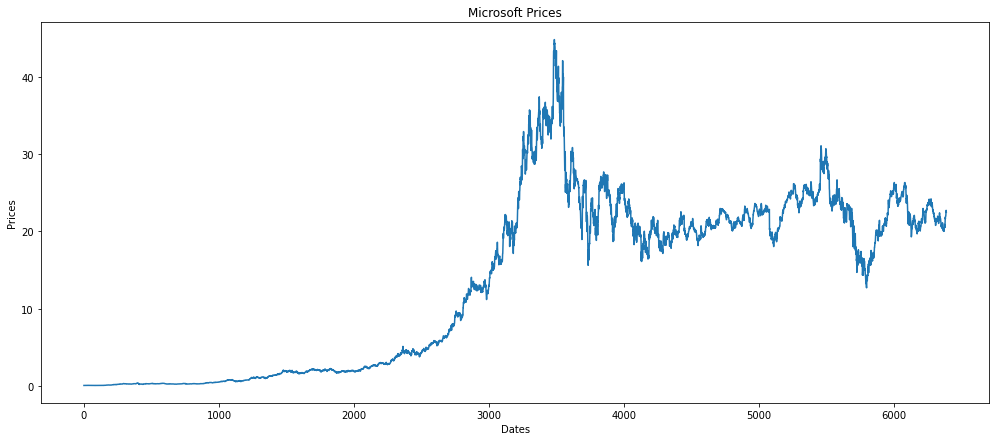

In [19]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):] # Train and test split
plt.figure(figsize=(17,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Close'])


#### Define a function for calculating the loss (Mean absolute percentage error)

In [20]:
# Function to Calculate the mean absolute percentage error
# The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is.
# It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time 
# period minus actual values divided by actual values
def  Mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

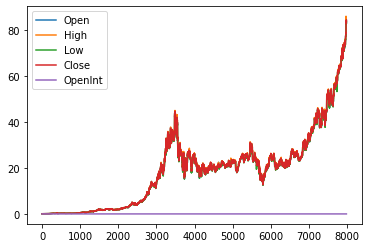

In [21]:
df.plot()

#### ACF and PACF Plot

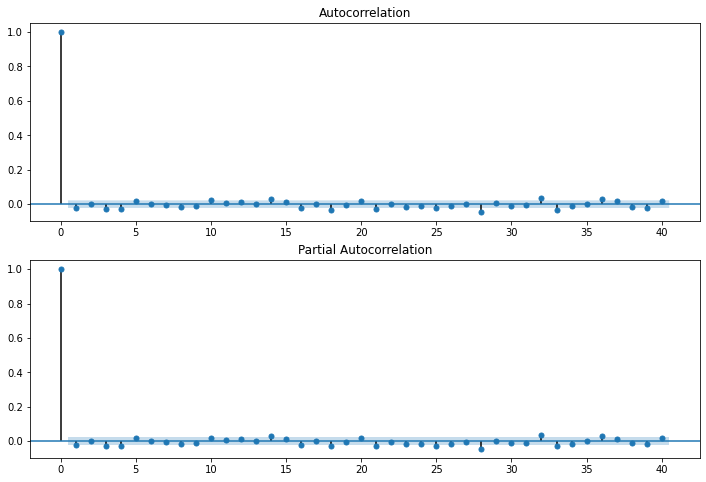

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff, lags=40, ax=ax2)

###ARIMA model

In [23]:
# ARIMA model

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]

predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(1,0,0))   
    model_fit = model.fit(disp=0)     
    # Above, disp=0 setting turns off the large amount of debug information provided
    # regarding the fit of the regression model.
    output = model_fit.forecast() # one-step forecast
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=22.472041, expected=22.400000
predicted=22.394073, expected=22.478000
predicted=22.472043, expected=22.342000
predicted=22.336100, expected=22.606000
predicted=22.599991, expected=22.445000
predicted=22.439058, expected=23.249000
predicted=23.242731, expected=22.840000
predicted=22.833895, expected=22.867000
predicted=22.860885, expected=23.239000
predicted=23.232738, expected=23.557000
predicted=23.550615, expected=23.698000
predicted=23.691564, expected=23.068000
predicted=23.061807, expected=23.402000
predicted=23.395677, expected=23.124000
predicted=23.117788, expected=23.018000
predicted=23.011830, expected=22.619000
predicted=22.612993, expected=22.724000
predicted=22.717951, expected=21.898000
predicted=21.892295, expected=21.678000
predicted=21.672391, expected=20.667000
predicted=20.661839, expected=21.591000
predicted=21.585420, expected=20.428000
predicted=20.422941, expected=21.261000
predicted=21.255557, expected=21.184000
predicted=21.178592, expected=21.534000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.091246, expected=22.268000
predicted=22.262173, expected=22.216000
predicted=22.210199, expected=22.901000
predicted=22.894908, expected=23.448000
predicted=23.441688, expected=23.689000
predicted=23.682595, expected=24.049000
predicted=24.042456, expected=23.740000
predicted=23.733576, expected=23.825000
predicted=23.818546, expected=23.724000
predicted=23.717586, expected=23.963000
predicted=23.956495, expected=24.179000
predicted=24.172415, expected=24.183000
predicted=24.176414, expected=24.160000
predicted=24.153425, expected=24.064000
predicted=24.057464, expected=25.427000
predicted=25.419966, expected=25.442000
predicted=25.434963, expected=25.109000
predicted=25.102077, expected=25.298000
predicted=25.291015, expected=25.246000
predicted=25.239033, expected=25.017000
predicted=25.010114, expected=25.340000
predicted=25.333004, expected=25.274000
predicted=25.267028, expected=25.581000
predicted=25.573926, expected=25.629000
predicted=25.621915, expected=25.877000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=25.788004, expected=25.701000
predicted=25.694037, expected=25.554000
predicted=25.547087, expected=25.500000
predicted=25.493106, expected=25.310000
predicted=25.303174, expected=25.795000
predicted=25.788010, expected=25.971000
predicted=25.963954, expected=26.239000
predicted=26.231870, expected=26.298000
predicted=26.290854, expected=26.447000
predicted=26.439809, expected=26.376000
predicted=26.368834, expected=26.351000
predicted=26.343843, expected=26.298000
predicted=26.290862, expected=26.361000
predicted=26.353845, expected=26.866000
predicted=26.858693, expected=26.971000
predicted=26.963665, expected=26.831000
predicted=26.823708, expected=26.883000
predicted=26.875693, expected=26.657000
predicted=26.649762, expected=26.404000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.396840, expected=26.673000
predicted=26.665761, expected=26.788000
predicted=26.780727, expected=26.735000
predicted=26.727746, expected=26.752000
predicted=26.744740, expected=26.464000
predicted=26.456831, expected=26.900000
predicted=26.892703, expected=26.525000
predicted=26.517814, expected=26.525000
predicted=26.517816, expected=27.352000
predicted=27.344572, expected=27.014000
predicted=27.006668, expected=26.813000
predicted=26.805731, expected=26.875000
predicted=26.867713, expected=26.866000
predicted=26.858717, expected=26.996000
predicted=26.988683, expected=27.241000
predicted=27.233614, expected=27.241000
predicted=27.233617, expected=27.205000
predicted=27.197628, expected=27.101000
predicted=27.093657, expected=27.451000
predicted=27.443563, expected=27.223000
predicted=27.215628, expected=26.866000
predicted=26.858734, expected=26.525000
predicted=26.517836, expected=26.333000
predicted=26.325897, expected=26.325000
predicted=26.317901, expected=25.976000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=30.180013, expected=30.052000
predicted=30.044043, expected=28.686000
predicted=28.678344, expected=28.065000
predicted=28.057505, expected=28.111000
predicted=28.103497, expected=28.028000
predicted=28.020521, expected=28.488000
predicted=28.480397, expected=29.145000
predicted=29.137232, expected=29.461000
predicted=29.453160, expected=29.415000
predicted=29.407176, expected=29.722000
predicted=29.714107, expected=29.514000
predicted=29.506156, expected=29.628000
predicted=29.620134, expected=29.983000
predicted=29.975055, expected=30.270000
predicted=30.262001, expected=29.504000
predicted=29.496164, expected=29.461000
predicted=29.453177, expected=29.206000
predicted=29.198236, expected=29.253000
predicted=29.245226, expected=29.484000
predicted=29.476176, expected=29.936000
predicted=29.928077, expected=29.944000
predicted=29.936079, expected=30.214000
predicted=30.206025, expected=30.520000
predicted=30.511966, expected=30.467000
predicted=30.458980, expected=30.485000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=34.116542, expected=33.863000
predicted=33.854564, expected=34.088000
predicted=34.079552, expected=34.569000
predicted=34.560526, expected=34.859000
predicted=34.850515, expected=34.733000
predicted=34.724524, expected=35.305000
predicted=35.296507, expected=34.452000
predicted=34.443535, expected=34.779000
predicted=34.770525, expected=35.096000
predicted=35.087513, expected=34.552000
predicted=34.543536, expected=34.097000
predicted=34.088564, expected=33.746000
predicted=33.737592, expected=33.265000
predicted=33.256634, expected=33.437000
predicted=33.428622, expected=33.110000
predicted=33.101656, expected=33.164000
predicted=33.155657, expected=32.865000
predicted=32.856689, expected=33.364000
predicted=33.355637, expected=33.200000
predicted=33.191657, expected=33.618000
predicted=33.609621, expected=33.942000
predicted=33.933596, expected=33.808000
predicted=33.799613, expected=33.808000
predicted=33.799615, expected=33.918000
predicted=33.909609, expected=33.690000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=36.963673, expected=36.806000
predicted=36.797676, expected=37.110000
predicted=37.101683, expected=37.660000
predicted=37.651699, expected=37.522000
predicted=37.513696, expected=37.062000
predicted=37.053689, expected=37.091000
predicted=37.082694, expected=37.909000
predicted=37.900716, expected=38.157000
predicted=38.148730, expected=37.964000
predicted=37.955725, expected=37.817000
predicted=37.808722, expected=37.585000
predicted=37.576716, expected=37.328000
predicted=37.319711, expected=37.926000
predicted=37.917733, expected=38.175000
predicted=38.166748, expected=38.340000
predicted=38.331762, expected=38.312000
predicted=38.303762, expected=38.184000
predicted=38.175760, expected=38.340000
predicted=38.331774, expected=38.624000
predicted=38.615790, expected=38.396000
predicted=38.387783, expected=38.662000
predicted=38.653799, expected=38.378000
predicted=38.369787, expected=38.864000
predicted=38.855817, expected=38.359000
predicted=38.350790, expected=38.515000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=40.956037, expected=41.110000
predicted=41.102062, expected=41.238000
predicted=41.230081, expected=41.238000
predicted=41.230085, expected=41.275000
predicted=41.267094, expected=40.842000
predicted=40.834044, expected=40.935000
predicted=40.927058, expected=40.447000
predicted=40.439005, expected=40.365000
predicted=40.357000, expected=40.088000
predicted=40.079975, expected=39.702000
predicted=39.693940, expected=39.425000
predicted=39.416922, expected=39.893000
predicted=39.884963, expected=39.629000
predicted=39.620942, expected=39.316000
predicted=39.307919, expected=39.766000
predicted=39.757961, expected=39.738000
predicted=39.729962, expected=39.738000
predicted=39.729965, expected=40.032000
predicted=40.023995, expected=40.546000
predicted=40.538049, expected=40.721000
predicted=40.713071, expected=41.200000
predicted=41.192129, expected=41.496000
predicted=41.488168, expected=41.958000
predicted=41.950234, expected=41.605000
predicted=41.597187, expected=41.856000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=45.911948, expected=45.893000
predicted=45.885946, expected=45.780000
predicted=45.772930, expected=45.400000
predicted=45.392862, expected=44.914000
predicted=44.906782, expected=45.361000
predicted=45.353857, expected=44.691000
predicted=44.683738, expected=44.329000
predicted=44.321681, expected=44.216000
predicted=44.208667, expected=44.477000
predicted=44.469716, expected=44.532000
predicted=44.524726, expected=45.288000
predicted=45.280853, expected=45.140000
predicted=45.132831, expected=44.782000
predicted=44.774771, expected=45.492000
predicted=45.484894, expected=45.102000
predicted=45.094827, expected=44.421000
predicted=44.413710, expected=44.329000
predicted=44.321699, expected=43.685000
predicted=43.677597, expected=43.938000
predicted=43.930640, expected=43.732000
predicted=43.724612, expected=43.471000
predicted=43.463576, expected=42.066000
predicted=42.058371, expected=42.605000
predicted=42.597441, expected=44.262000
predicted=44.254657, expected=44.392000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=60.325414, expected=59.976000
predicted=59.970362, expected=60.921000
predicted=60.915507, expected=61.117000
predicted=61.111539, expected=61.913000
predicted=61.907665, expected=61.629000
predicted=61.623621, expected=61.520000
predicted=61.514605, expected=61.246000
predicted=61.240561, expected=62.544000
predicted=62.538753, expected=62.464000
predicted=62.458746, expected=62.474000
predicted=62.468749, expected=62.474000
predicted=62.468746, expected=62.170000
predicted=62.164706, expected=62.210000
predicted=62.204713, expected=61.923000
predicted=61.917670, expected=61.836000
predicted=61.830661, expected=61.089000
predicted=61.083542, expected=61.520000
predicted=61.514613, expected=61.246000
predicted=61.240570, expected=61.246000
predicted=61.240571, expected=61.776000
predicted=61.770652, expected=61.580000
predicted=61.574628, expected=61.560000
predicted=61.554626, expected=62.120000
predicted=62.114710, expected=61.550000
predicted=61.544625, expected=61.639000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=62.601149, expected=62.563000
predicted=62.557778, expected=62.357000
predicted=62.351745, expected=62.267000
predicted=62.261735, expected=62.975000
predicted=62.969844, expected=62.916000
predicted=62.910834, expected=63.624000
predicted=63.618940, expected=63.862000
predicted=63.856968, expected=63.822000
predicted=63.816967, expected=63.812000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=63.812174, expected=63.911000
predicted=63.905981, expected=63.782000
predicted=63.776968, expected=63.654000
predicted=63.648951, expected=63.911000
predicted=63.905988, expected=63.911000
predicted=63.911137, expected=63.526000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=63.520935, expected=63.278000
predicted=63.272902, expected=64.198000
predicted=64.193025, expected=63.308000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=63.308165, expected=63.545000
predicted=63.539938, expected=63.565000
predicted=63.559944, expected=63.694000
predicted=63.688959, expected=64.278000
predicted=64.273048, expected=64.020000
predicted=64.015009, expected=64.218000
predicted=64.213038, expected=64.000000
predicted=63.995011, expected=63.704000
predicted=63.698969, expected=64.040000
predicted=64.035017, expected=63.931000
predicted=63.926001, expected=64.158000
predicted=64.153037, expected=64.218000
predicted=64.213052, expected=63.506000
predicted=63.500951, expected=64.316000
predicted=64.311057, expected=64.158000
predicted=64.153039, expected=64.268000
predicted=64.263057, expected=64.386000
predicted=64.381073, expected=64.574000
predicted=64.569100, expected=64.752000
predicted=64.747121, expected=64.990000
predicted=64.990033, expected=65.138000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=65.133178, expected=64.831000
predicted=64.826141, expected=65.009000
predicted=65.004162, expected=64.841000
predicted=64.836144, expected=65.009000
predicted=65.004154, expected=64.960000
predicted=64.955163, expected=64.812000
predicted=64.807147, expected=64.762000
predicted=64.757138, expected=64.514000
predicted=64.509110, expected=64.238000
predicted=64.233073, expected=64.762000
predicted=64.757144, expected=64.672000
predicted=64.667132, expected=64.326000
predicted=64.321086, expected=64.782000
predicted=64.777148, expected=65.672000
predicted=65.667264, expected=66.789000
predicted=66.784400, expected=67.175000
predicted=67.175000, expected=67.086000
predicted=67.081436, expected=67.521000
predicted=67.521000, expected=67.709000
predicted=67.709000, expected=68.648000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=68.643629, expected=68.540000
predicted=68.535615, expected=68.322000
predicted=68.317588, expected=68.055000
predicted=68.050561, expected=68.243000
predicted=68.238586, expected=68.184000
predicted=68.184000, expected=68.283000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=68.278589, expected=68.550000
predicted=68.545625, expected=67.709000
predicted=67.704522, expected=67.630000
predicted=67.625510, expected=67.679000
predicted=67.679000, expected=69.042000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=69.037669, expected=67.122000
predicted=67.122000, expected=67.351000
predicted=67.346458, expected=67.331000
predicted=67.331000, expected=68.087000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=68.082547, expected=68.316000
predicted=68.311567, expected=68.406000
predicted=68.406000, expected=69.251000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=69.246679, expected=69.589000
predicted=69.589000, expected=70.037000
predicted=70.032770, expected=69.470000
predicted=69.470000, expected=69.728000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=69.723739, expected=71.370000
predicted=71.370000, expected=71.897000
predicted=71.897000, expected=72.136000
predicted=72.136000, expected=72.006000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=72.001970, expected=71.569000
predicted=71.564925, expected=69.947000
predicted=69.942748, expected=69.410000
predicted=69.405685, expected=70.276000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=70.276000, expected=69.898000
predicted=69.898000, expected=69.530000
predicted=69.530000, expected=69.629000
predicted=69.624709, expected=70.494000
predicted=70.489801, expected=69.540000
predicted=69.540000, expected=69.898000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=69.893739, expected=69.888000
predicted=69.883733, expected=70.833000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=70.833000, expected=70.156000
predicted=70.151763, expected=68.843000
predicted=68.838601, expected=69.430000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=69.430000, expected=68.127000
predicted=68.122518, expected=68.565000
predicted=68.560572, expected=67.809000
predicted=67.804481, expected=68.714000
predicted=68.709584, expected=68.207000
predicted=68.202526, expected=69.092000
predicted=69.092000, expected=69.609000
predicted=69.609000, expected=69.619000
predicted=69.619000, expected=70.773000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=70.768805, expected=71.390000
predicted=71.390000, expected=72.394000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=72.389970, expected=72.961000
predicted=72.961000, expected=72.912000
predicted=72.912000, expected=73.469000
predicted=73.465070, expected=73.827000
predicted=73.827000, expected=73.399000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=73.395065, expected=73.210000
predicted=73.206055, expected=73.797000
predicted=73.793106, expected=73.658000
predicted=73.654097, expected=72.772000
predicted=72.772000, expected=72.653000
predicted=72.653000, expected=72.315000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=72.310966, expected=72.195000
predicted=72.195000, expected=71.877000
predicted=71.872926, expected=71.768000
predicted=71.763916, expected=72.295000
predicted=72.295000, expected=72.016000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=72.011945, expected=72.404000
predicted=72.404000, expected=72.086000
predicted=72.086000, expected=71.032000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=71.027836, expected=72.116000
predicted=72.111953, expected=73.200000
predicted=73.196045, expected=73.220000
predicted=73.216049, expected=73.650000
predicted=73.650000, expected=72.400000
predicted=72.400000, expected=72.490000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=72.485974, expected=72.150000
predicted=72.145943, expected=73.160000
predicted=73.156039, expected=72.720000
predicted=72.715997, expected=72.690000
predicted=72.685998, expected=72.820000
predicted=72.820000, expected=72.830000
predicted=72.826008, expected=73.050000
predicted=73.046032, expected=74.010000
predicted=74.010000, expected=74.800000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=74.796193, expected=73.940000
predicted=73.936111, expected=73.610000
predicted=73.610000, expected=73.400000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=73.396064, expected=74.340000
predicted=74.340000, expected=73.980000
predicted=73.976116, expected=74.760000
predicted=74.760000, expected=74.680000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=74.676176, expected=75.210000
predicted=75.206228, expected=74.770000
predicted=74.766187, expected=75.310000
predicted=75.310000, expected=75.160000
predicted=75.156228, expected=75.440000
predicted=75.436247, expected=74.940000
predicted=74.940000, expected=74.210000
predicted=74.210000, expected=74.410000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=74.410000, expected=73.260000
predicted=73.256050, expected=73.260000
predicted=73.256048, expected=73.850000
predicted=73.850000, expected=73.870000
predicted=73.870000, expected=74.490000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=74.486162, expected=74.610000
predicted=74.606175, expected=74.260000
predicted=74.256146, expected=74.690000
predicted=74.686178, expected=75.970000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=75.970000, expected=76.000000
predicted=75.996294, expected=76.290000
predicted=76.286319, expected=76.290000
predicted=76.290000, expected=76.420000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=76.416334, expected=77.120000
predicted=77.116388, expected=77.490000
predicted=77.486415, expected=77.650000
predicted=77.646430, expected=77.590000
predicted=77.586429, expected=77.610000
predicted=77.606432, expected=77.910000
predicted=77.906456, expected=78.810000
predicted=78.810000, expected=78.830000
predicted=78.830000, expected=78.860000
predicted=78.860000, expected=78.630000
predicted=78.630000, expected=78.760000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=78.756522, expected=83.810000
predicted=83.810000, expected=83.890000
predicted=83.890000, expected=83.180000
predicted=83.176762, expected=83.180000
predicted=83.180000, expected=84.050000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=84.046819, expected=84.140000
predicted=84.140000, expected=84.470000
predicted=84.470000, expected=84.260000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=84.256832, expected=84.560000
predicted=84.556851, expected=84.090000
predicted=84.090000, expected=83.870000


In [24]:
error = Mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error)

Mean absolute percentage error: 45.995


### Here we plot our predictions

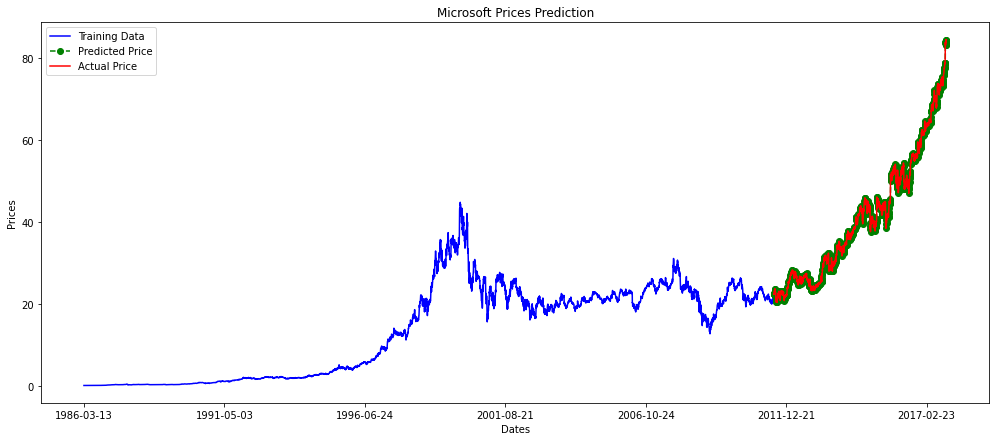

In [25]:
# Plot the predictions
plt.figure(figsize=(17,7))
plt.title('Microsoft Prices Prediction')
plt.plot(train_data['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green',marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

### Lets Compare Predicted and Actual visually

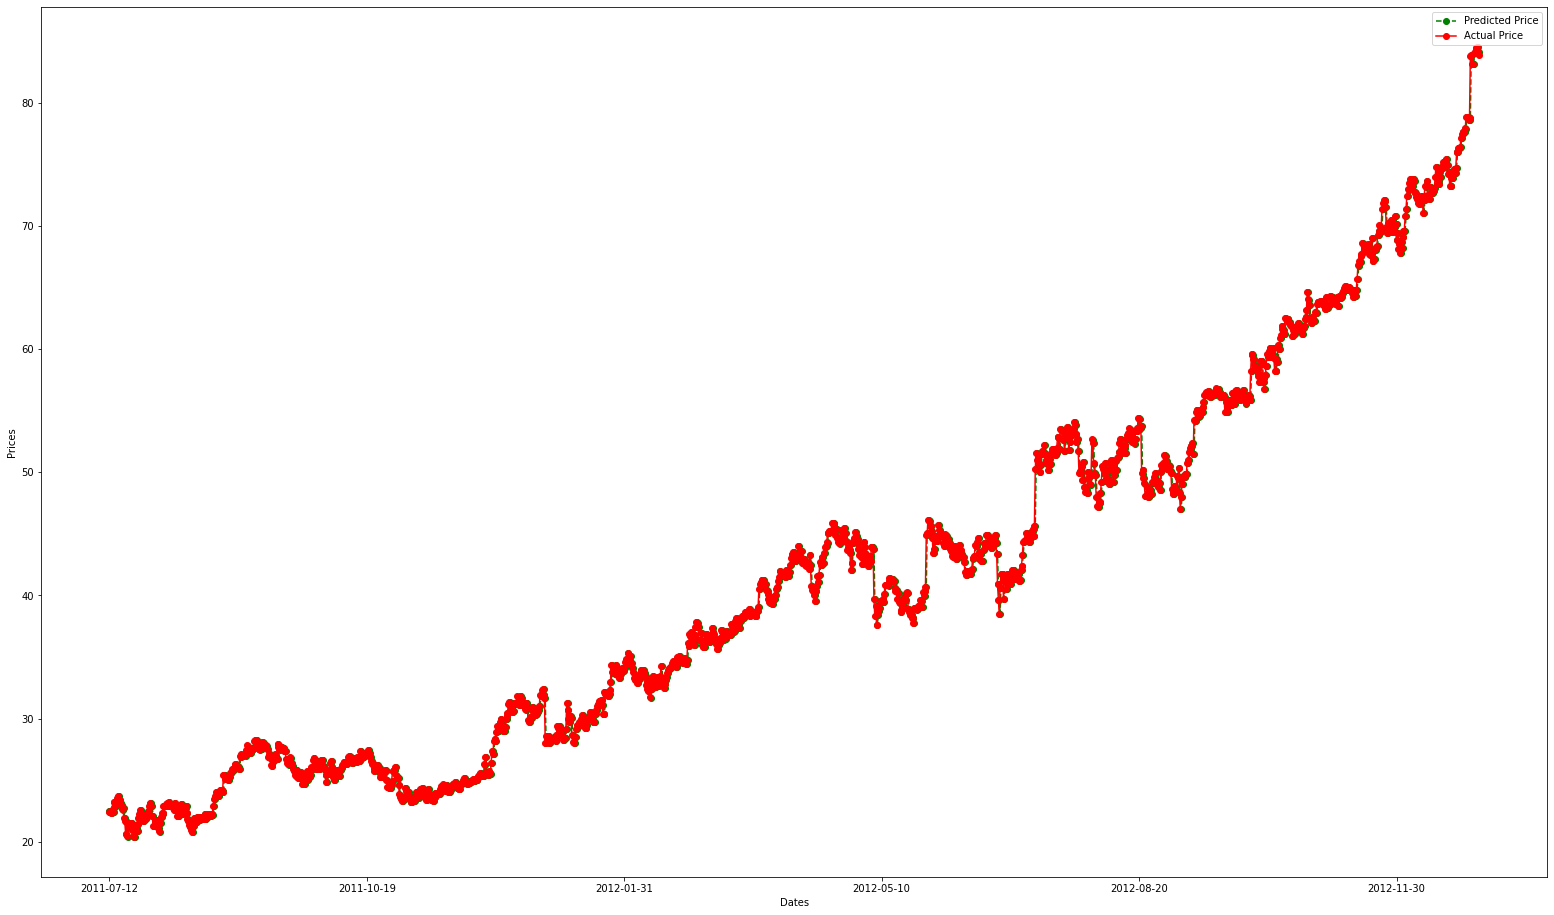

In [26]:
plt.figure(figsize=(27,16))
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(test_data.index, predictions, color='green',marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red',marker='o', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(6386,7982, 300), df['Date'][6386:7982:70])
plt.legend()
plt.show()